In [ ]:


import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:00


In [ ]:
pd.options.display.max_columns=100 # to see columns

In [ ]:
df_store = pd.read_csv('/content/sample_data/walmart/stores.csv') #store data

In [ ]:
df_train = pd.read_csv('/content/sample_data/walmart/train.csv') #train set

In [ ]:
df_features = pd.read_csv('/content/sample_data/walmart/features.csv') #feature set

In [ ]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#MERGED ALL THE 3 SETS TOGETHER INTO DF:
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
#RENAME AND REMOVE THE DUPLICATE ISHOLIDAY COLUMNS:

df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


DATA EXPLORATION:


NUMBER OF STORES AND DEPARTMENTS:

In [ ]:
df['Store'].nunique() # number of unique stores

45

In [ ]:
df['Dept'].nunique() # number of unique departments

81

AVERAGE WEEKLY SALES FOR EACH STORE AND EACH DEPARTMENT:

In [ ]:

store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

THERE CAN BE SEEN SOME WRONG VALUES IN THE WEEKLY SALES LIKE ZEROS AND NEGATIVE SALES. SO RECTIFYING THOSE ENTERS AND MAKING THE FINAL DATASET.

In [ ]:
# Filter out rows where 'Weekly_Sales' <= 0
df = df[df['Weekly_Sales'] > 0]

# Verify the rows are removed
print(df)


        Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1  2010-02-05      24924.50      False        42.31   
1           1     1  2010-02-12      46039.49       True        38.51   
2           1     1  2010-02-19      41595.55      False        39.93   
3           1     1  2010-02-26      19403.54      False        46.63   
4           1     1  2010-03-05      21827.90      False        46.50   
...       ...   ...         ...           ...        ...          ...   
421565     45    98  2012-09-28        508.37      False        64.88   
421566     45    98  2012-10-05        628.10      False        64.89   
421567     45    98  2012-10-12       1061.02      False        54.47   
421568     45    98  2012-10-19        760.01      False        56.47   
421569     45    98  2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572        NaN        NaN      

CHECKING THE SALES ON HOLIDAYS VS REGULAR DAYS USING BARPLOT:

AS SEEN FROM THE BARPLOT,THE WEEKLY SALES IN HOLIDAYS IS MORE THAN THE WEEKLY SALES IN REGULAR DAYS.

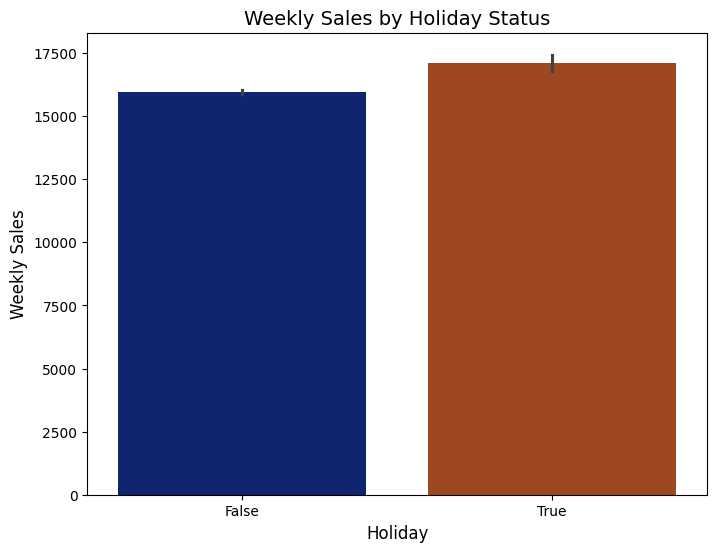

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='dark')

# Add titles and labels
plt.title('Weekly Sales by Holiday Status', fontsize=14)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.show()


LISTING ALL THE HOLIDAYS [HOLIDAYS = TRUE]

THERE ARE 4 HOLIDAYS/HOLIDAY WEEKS:
FEB - SUPER BOWL,
SEPTEMBER - LABOR DAY,
NOVEMBER - THANKSGIVING,
DECEMBER - CHRISTMAS

In [ ]:

df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

CREATED NEW COLUMNS WITH BOOLEAN VALUES FOR DATE SPECIFICS. IF THE DATES BELONG TO HOLIDAYS AND WHICH DATES AND FOR WHICH PARTICULAR HOLIDAY.

In [ ]:
# Dates for super bowl:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:

#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

PLOTTED BARPLOTS FOR EACH HOLIDAY WEEKLY SALES:

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

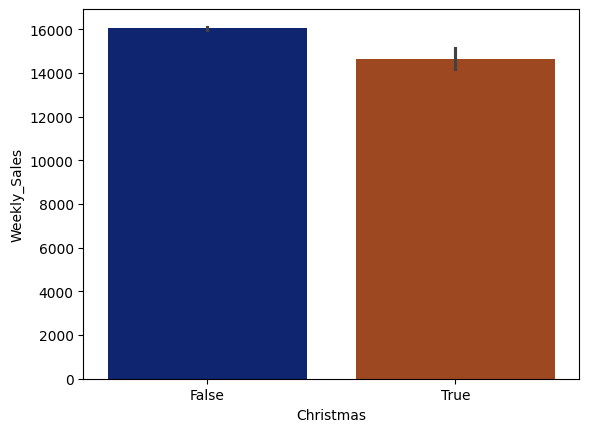

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df , palette='dark') #christmas holiday vs non-christmas

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

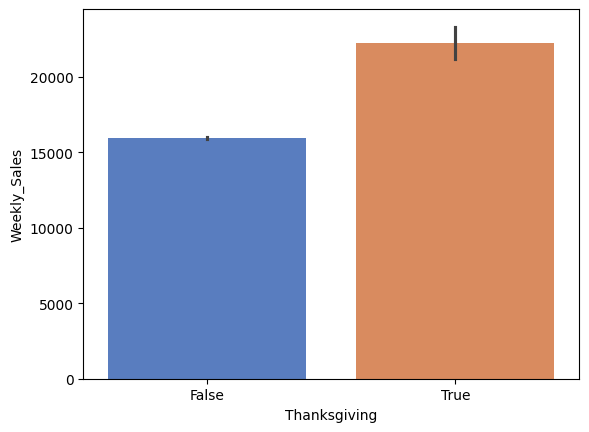

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df, palette='muted') # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

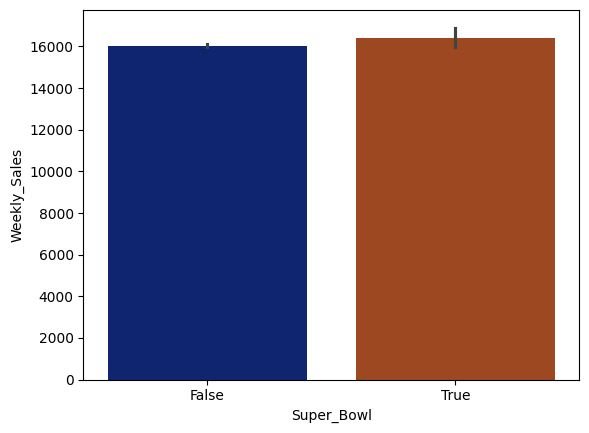

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df, palette='dark') # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

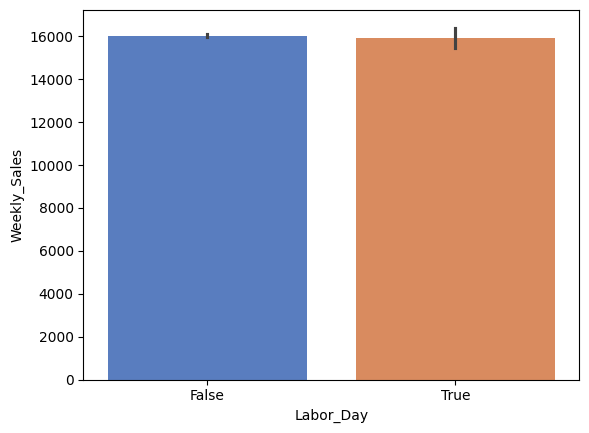

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df, palette='muted') # Labor day holiday vs not-labor day

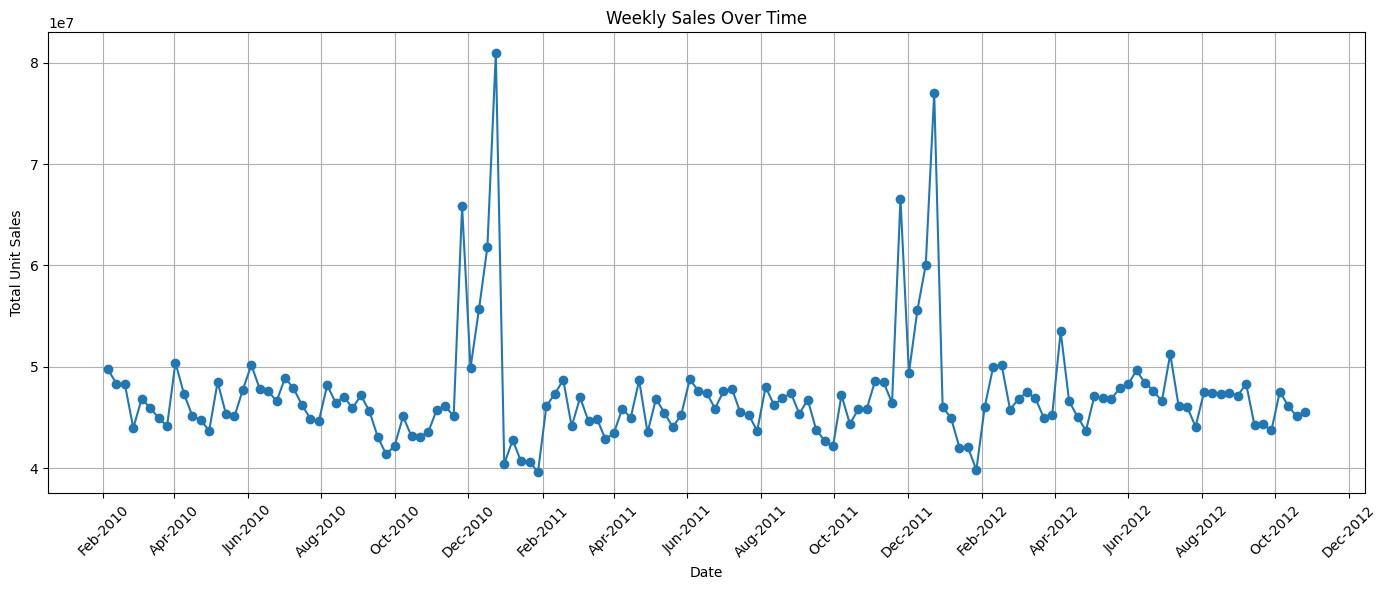

In [ ]:
import matplotlib.dates as mdates

# Aggregate sales by date
daily_sales = df.groupby('Date', as_index=False)['Weekly_Sales'].sum()

# Convert Date column to datetime format
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Plot the aggregated sales over time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Unit Sales')

# Improve x-axis date formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Format as Month-Year
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.grid(True)  # Add grid for clarity
plt.tight_layout()
plt.show()


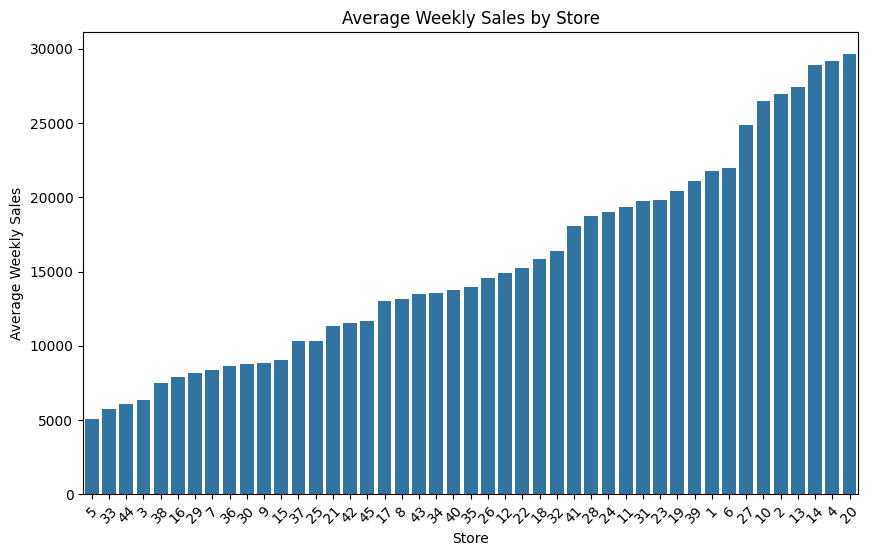

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Store and calculate the mean Weekly_Sales
store_sales = df.groupby('Store', as_index=False)['Weekly_Sales'].mean()

# Sort values for better visualization
store_sales = store_sales.sort_values('Weekly_Sales')

# Plot Average Weekly Sales by Store
plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales', order=store_sales['Store'])
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)  # Rotate x-axis for readability
plt.show()


TO CHECK IF TEMPERATURE AND FUEL PRICES AFFECT THE SALES:


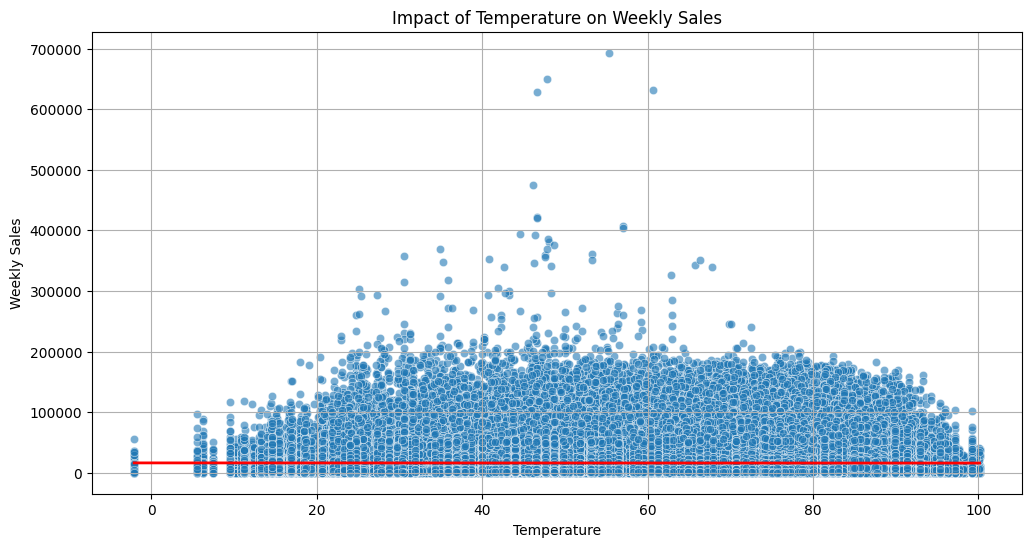

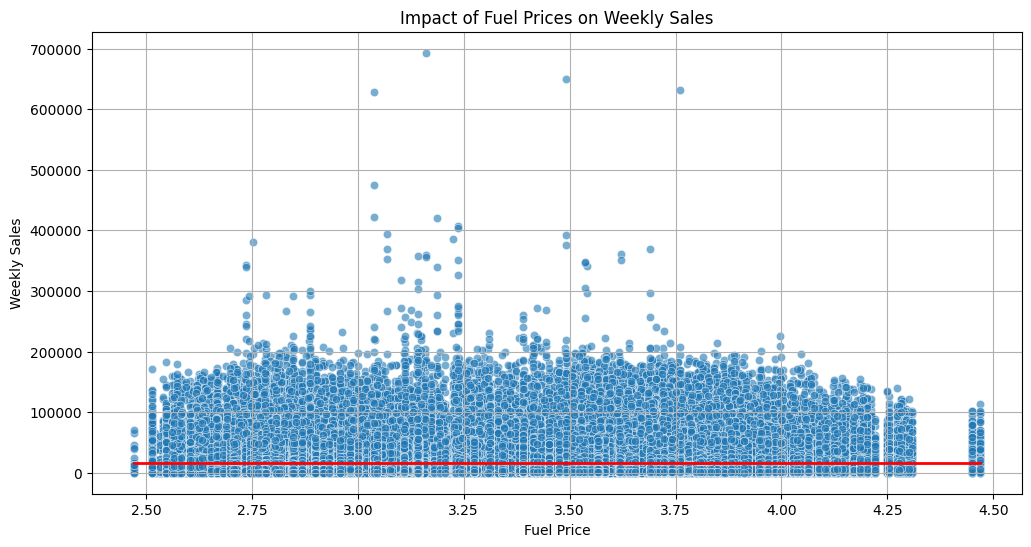

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Temperature vs Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', alpha=0.6)
sns.regplot(data=df, x='Temperature', y='Weekly_Sales', scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Impact of Temperature on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Scatter plot: Fuel Price vs Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', alpha=0.6)
sns.regplot(data=df, x='Fuel_Price', y='Weekly_Sales', scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Impact of Fuel Prices on Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


TIME SERIES MODELS:

In [ ]:
df.head() # to see my data


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,High_Sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,1
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,True,False,False,False,1
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,False,False,False,False,1
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,False,False,False,False,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,False,False,False,False,1


ARIMA MODEL:


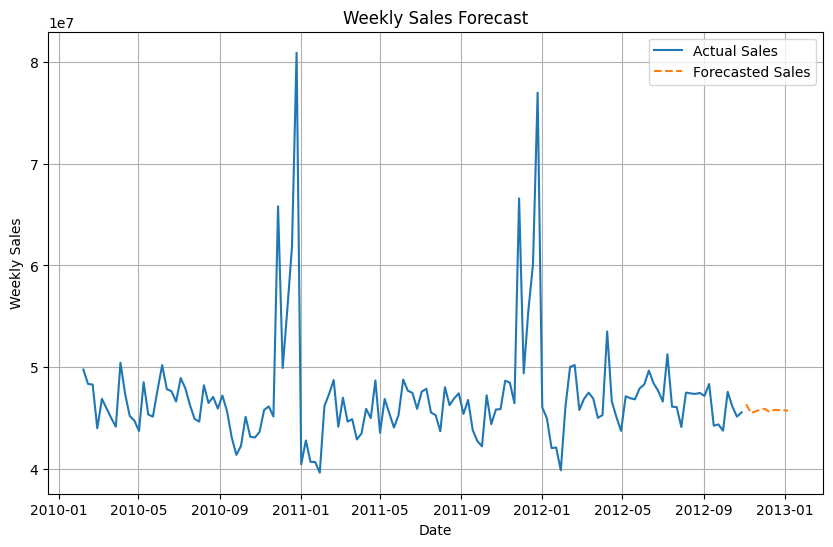

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Aggregate sales by date
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Train ARIMA model
model = ARIMA(weekly_sales, order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=10)  # Predict next 10 weeks

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', linestyle='--')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


DECISION TREE [ DID NOT GIVE US THE EXPECTED RESULTS. SHOWED VARIATION AND LOW ACCURACY, SO WE TRIED CORRECTING THE CODE FOR THE SAME] CODE BELOW

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['IsHoliday', 'CPI', 'Unemployment', 'Size']]
y = df['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 467871920.74


In [ ]:
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


Random Forest - Mean Squared Error (MSE): 470226452.07
Random Forest - R² Score: 0.08


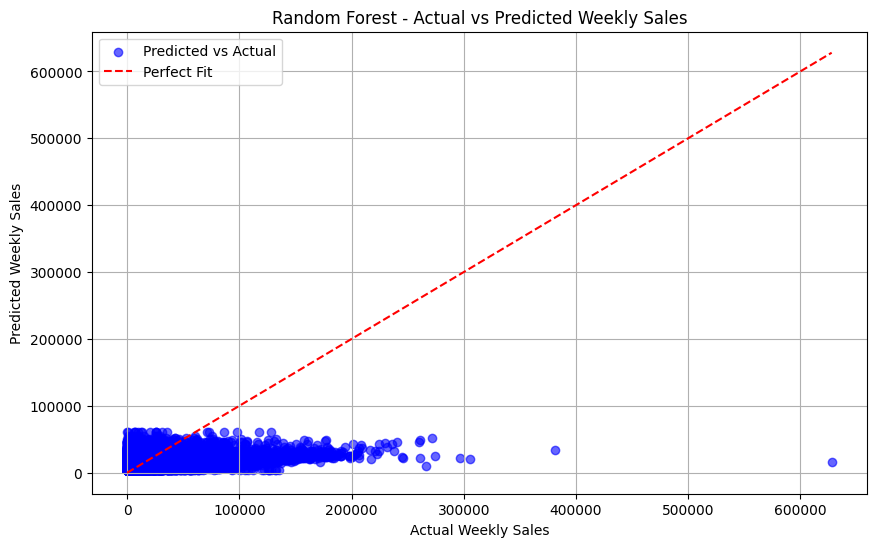

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features and target
X = df[['IsHoliday', 'CPI', 'Unemployment', 'Size']].dropna()  # Select features
y = df['Weekly_Sales'].dropna()  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 3: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Squared Error (MSE): {mse:.2f}")
print(f"Random Forest - R² Score: {r2:.2f}")

# Step 4: Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Random Forest - Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Clean Data
# Assuming 'df' is your dataset loaded
df = df.dropna(subset=['Weekly_Sales'])  # Drop rows with missing target variable

# Step 2: Handle Outliers in Weekly_Sales
q1 = df['Weekly_Sales'].quantile(0.01)
q3 = df['Weekly_Sales'].quantile(0.99)
df = df[(df['Weekly_Sales'] >= q1) & (df['Weekly_Sales'] <= q3)]

# Step 3: Feature Engineering
# Rolling average based on row index (not time-based)
df['Rolling_Avg_Sales'] = df['Weekly_Sales'].rolling(window=3, min_periods=1).mean()

# Step 4: Define Features and Target
features = ['IsHoliday', 'CPI', 'Unemployment', 'Size',
            'Fuel_Price', 'Temperature', 'Rolling_Avg_Sales']  # Use remaining features
X = df[features]
y = df['Weekly_Sales']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Tuning Hyperparameters...")
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 7: Model Training and Predictions
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Step 8: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 9: Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Random Forest - Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Feature Importance
plt.figure(figsize=(10, 6))
importance = best_rf_model.feature_importances_
sns.barplot(x=importance, y=features, palette="viridis")
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Tuning Hyperparameters...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
print(df.columns)


Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas', 'High_Sales'],
      dtype='object')


XGBOOST:

XGBoost - Mean Squared Error: 268758640.55
XGBoost - R² Score: 0.08


<Figure size 1000x600 with 0 Axes>

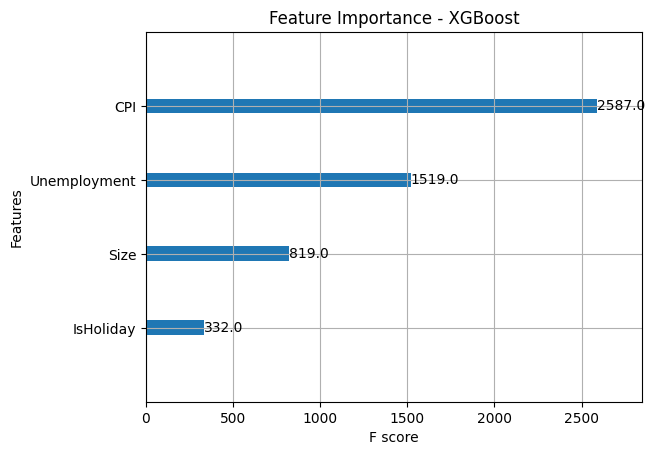

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['IsHoliday', 'CPI', 'Unemployment', 'Size']].dropna()
y = df['Weekly_Sales'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - Mean Squared Error: {mse:.2f}")
print(f"XGBoost - R² Score: {r2:.2f}")

# Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model)
plt.title('Feature Importance - XGBoost')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Define features and target
X = df[['IsHoliday', 'CPI', 'Unemployment', 'Size']].dropna()
y = df['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - Mean Squared Error: {mse:.2f}")
print(f"XGBoost - R² Score: {r2:.2f}")


XGBoost - Mean Squared Error: 268758640.55
XGBoost - R² Score: 0.08


LSTM:

Epoch 1/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - loss: 0.0032
Epoch 2/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - loss: 0.0022
Epoch 3/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - loss: 0.0022
Epoch 4/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - loss: 0.0021
Epoch 5/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 59s 5ms/step - loss: 0.0021
Epoch 6/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0021
Epoch 7/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.0021
Epoch 8/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - loss: 0.0021
Epoch 9/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 0.0021
Epoch 10/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - loss: 0.0021
Epoch 11/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 0.0021
Epoch 12/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 0.0021
Epoch 13/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - loss: 0.0020
Epoch 14/20
12613/12613 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - 

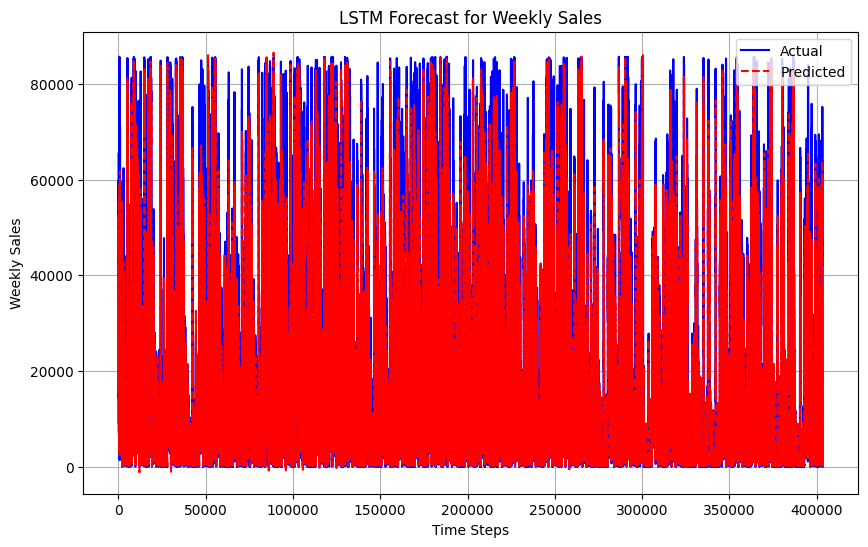

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data
data = df[['Weekly_Sales']].dropna()  # Keep only Weekly_Sales

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
X = []
y = []
window = 5  # Use 5 past values for prediction
for i in range(window, len(scaled_data)):
    X.append(scaled_data[i-window:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Inverse scaling
y_actual_inv = scaler.inverse_transform(y.reshape(-1, 1))

# Generate synthetic time steps (index)
time_steps = np.arange(len(y_actual_inv))  # Sequential index for plotting

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(time_steps, y_actual_inv, label='Actual', color='blue')
plt.plot(time_steps, y_pred_inv, label='Predicted', linestyle='--', color='red')
plt.title('LSTM Forecast for Weekly Sales')
plt.xlabel('Time Steps')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()
